# Sales Prediction Using Python

The advertising dataset tracks sales revenue in relation to advertising expenses across various channels, including radio, TV, and newspapers. Our goal is to build a powerful machine learning model that forecasts sales from advertising budgets, assisting businesses in optimizing their marketing strategies for enhanced sales impact and profitability in the competitive business landscape.

# Importing Libaries &  Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv("advertising.csv")

In [3]:
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
print("Rows :",sales.shape[0])
print("Columns:",sales.shape[1])

Rows : 200
Columns: 4


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
print('Missing values in the dataset:')
sales.isnull().sum()

Missing values in the dataset:


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
sales.duplicated().all()

False

There are no null values or missing values, so it's good to go.

In [8]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


From Here,<br>TV Advertising Expenditure ranges from 0.7 to 296.4.<br>
Radio Advertising Expenditure ranges from 0.0 to 49.6.<br>
Newspaper Advertising Expenditure ranges from 0.3 to 114.0.

In [9]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


TV advertising is highly positively correlated with sales.

# Data Visualization

**Checking for Outliers**

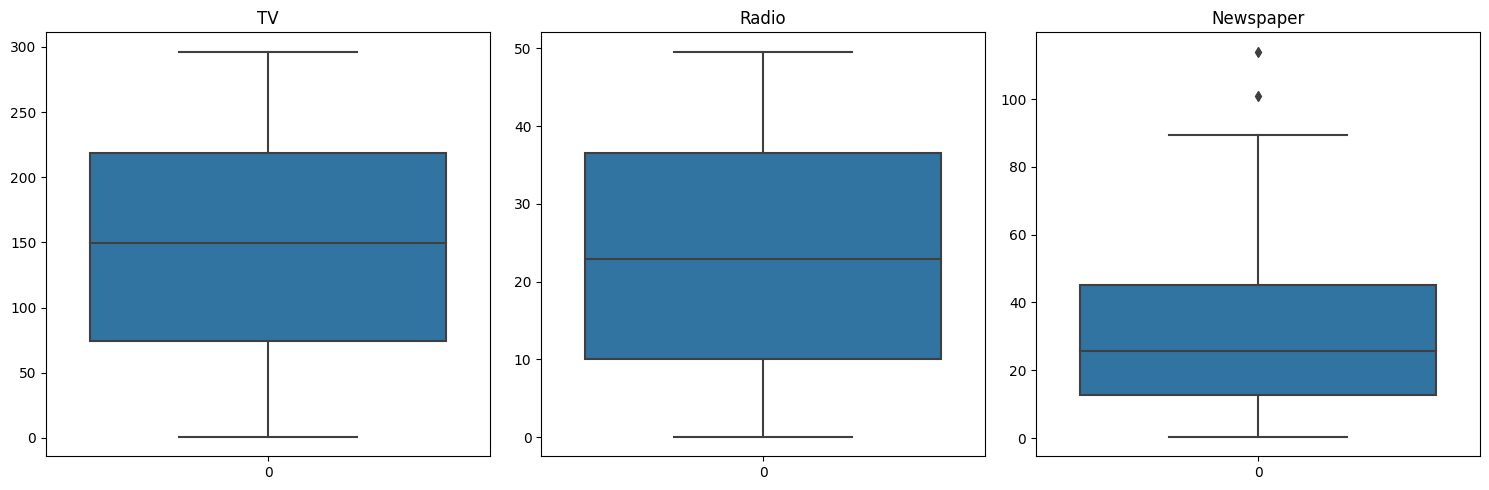

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(sales['TV'], ax=axs[0])
axs[0].set_title('TV')

sns.boxplot(sales['Radio'], ax=axs[1])
axs[1].set_title('Radio')

sns.boxplot(sales['Newspaper'], ax=axs[2])
axs[2].set_title('Newspaper')

plt.tight_layout()
plt.show()

We observe that there are outliers in the 'Newspaper' feature.

In [11]:
Q1 = sales['Newspaper'].quantile(0.25)
Q3 = sales['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = sales[(sales['Newspaper'] < (Q1 - threshold * IQR)) | (sales['Newspaper'] > (Q3 + threshold * IQR))]
print(outliers)

        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


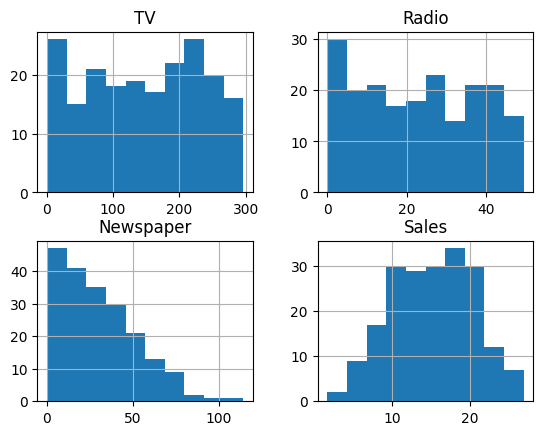

In [12]:
sales.hist()
plt.show()

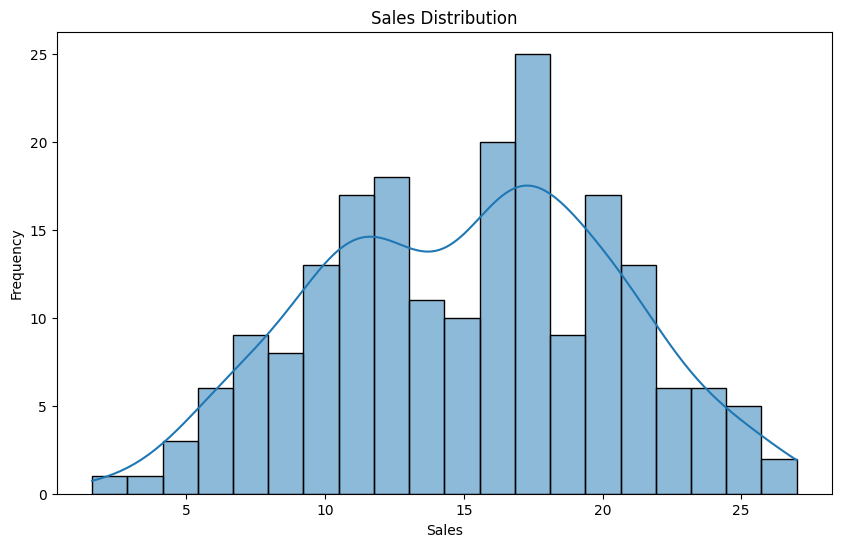

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(sales['Sales'], bins=20, kde=True, edgecolor='black')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

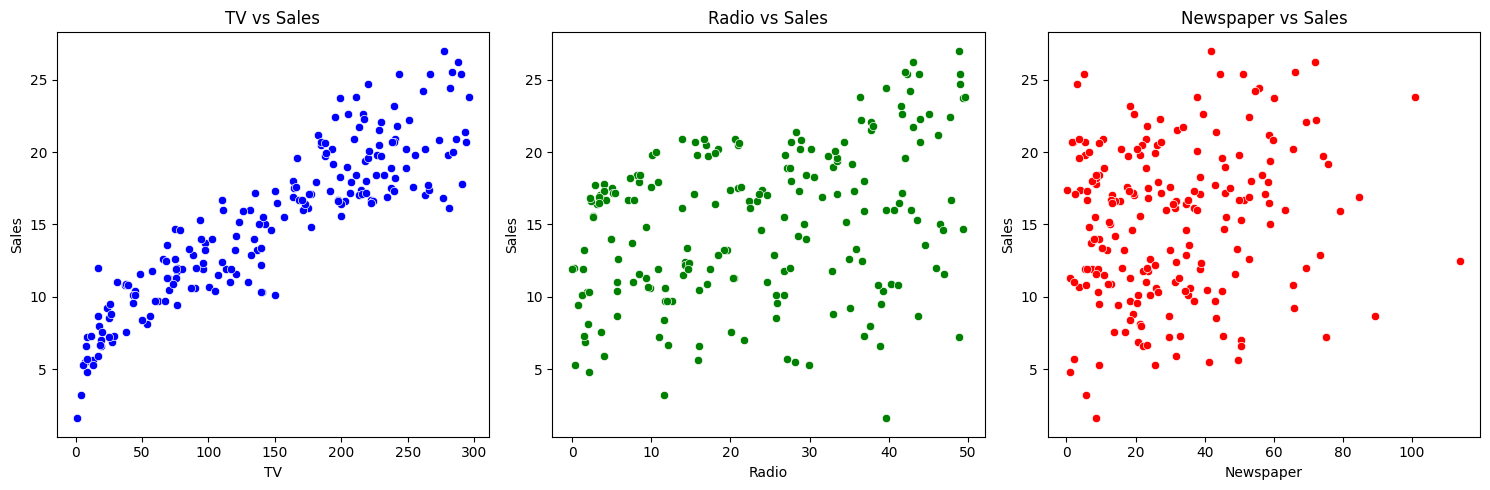

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x = 'TV', y = 'Sales', data = sales, color = 'blue')
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=sales, color='green')
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=sales, color='red')
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

The scatter plot suggests a positive relationship between TV advertising expenditure and sales, indicating that as TV advertising expenditure increases, sales also increase.

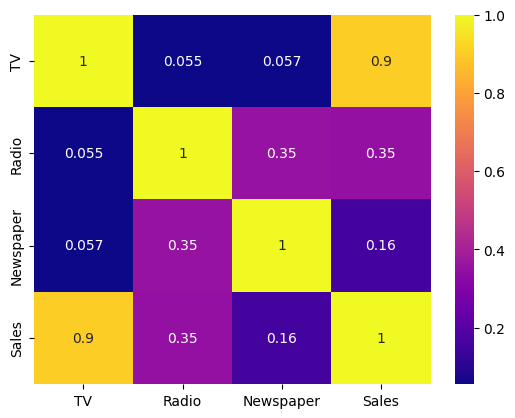

In [15]:
sns.heatmap(sales.corr(),annot=True,cmap='plasma')
plt.show()

We Observe<br>
1. TV advertising is highly effective and demonstrates the strongest correlation with increased sales.<br>
2. Radio advertising is moderately effective, though not as impactful as TV in driving sales.<br>
3. Newspaper advertising is the least effective medium, showing the weakest correlation with sales.

# Data Preprocessing

In [16]:
X = sales[['TV','Radio','Newspaper']]
Y = sales['Sales']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [19]:
print("Training Dataset:")
print("X (features) for training:", X_train.shape)
print("Y (labels) for training:", Y_train.shape)
print()

print("Testing Dataset:")
print("X (features) for testing:", X_test.shape)
print("Y (labels) for testing:", Y_test.shape)

Training Dataset:
X (features) for training: (160, 3)
Y (labels) for training: (160,)

Testing Dataset:
X (features) for testing: (40, 3)
Y (labels) for testing: (40,)


# Model Selection and Training

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

LinearRegression()

In [22]:
Y_pred1 = model_lr.predict(X_test)

In [23]:
mse = mean_squared_error(Y_test, Y_pred1)
rmse = mean_squared_error(Y_test, Y_pred1,squared = False)
r2 = r2_score(Y_test, Y_pred1)

print("Linear Regression Metrices\n")
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R2 Score:', r2)
print()
percentage = r2 * 100
print('Model Accuracy:',round(percentage,2),"%")

Linear Regression Metrices

Mean Squared Error: 4.4484754754328995
Root Mean Squared Error: 2.10914093304191
R2 Score: 0.8886717577059423

Model Accuracy: 88.87 %


In [24]:
model_lr.intercept_

4.79312364494618

In [25]:
model_lr.coef_

array([ 0.05352432,  0.10891759, -0.00136974])

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [28]:
Y_pred2 = model_rf.predict(X_test)

In [29]:
mse = mean_squared_error(Y_test, Y_pred2)
rmse = mean_squared_error(Y_test, Y_pred2, squared=False)
r2 = r2_score(Y_test, Y_pred2)

print("Random Forest Metrices\n")
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R2 Score:', r2)
print()
percentage = r2 * 100
print('Model Accuracy:',round(percentage,2),"%")

Random Forest Metrices

Mean Squared Error: 1.8481157249999949
Root Mean Squared Error: 1.3594542011410296
R2 Score: 0.9537487671098748

Model Accuracy: 95.37 %


## Comparing & Visualizing Actual Vs Predicted sales

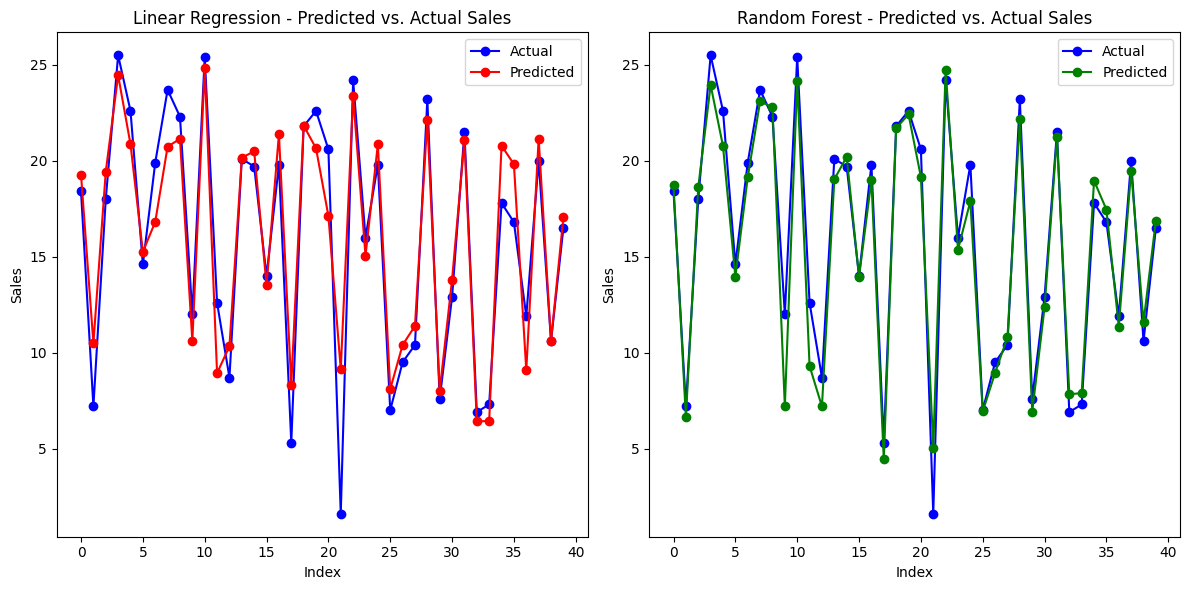

In [30]:
indices = np.arange(len(Y_test))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(indices, Y_test, color='blue', label='Actual', marker='o')
plt.plot(indices, Y_pred1, color='red', label='Predicted', marker='o')
plt.title('Linear Regression - Predicted vs. Actual Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(indices, Y_test, color='blue', label='Actual', marker='o')
plt.plot(indices, Y_pred2, color='green', label='Predicted', marker='o')
plt.title('Random Forest - Predicted vs. Actual Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()

In the visual comparison, the predicted sales points from the Random Forest model are notably closer to the actual sales values, indicating a higher precision and better predictive performance compared to the Linear Regression model.

# Model training using Random Forest

In [31]:
X = sales[['TV', 'Radio', 'Newspaper']]
Y = sales['Sales']

model = RandomForestRegressor(random_state=42)
model.fit(X,Y)

RandomForestRegressor(random_state=42)

# Making Sales Predictions

In [32]:
def predict_sales():
    print("🚀 Welcome to the Sales Prediction Tool! 📊\n")
    print("Please provide your advertising budget 💰:\n")
    tv = float(input("TV Ad Budget ($): [📺] "))
    radio = float(input("Radio Ad Budget ($): [📻] "))
    newspaper = float(input("Newspaper Ad Budget ($): [🗞️] "))

    data = pd.DataFrame({
        'TV': [tv],
        'Radio': [radio],
        'Newspaper': [newspaper]
    })
    predicted_sales = model.predict(data)
    print("\n✨ Predicted Sales: ${:.2f} ✨".format(predicted_sales[0]))
predict_sales()

🚀 Welcome to the Sales Prediction Tool! 📊

Please provide your advertising budget 💰:

TV Ad Budget ($): [📺] 95.0
Radio Ad Budget ($): [📻] 57.3
Newspaper Ad Budget ($): [🗞️] 69.2

✨ Predicted Sales: $15.40 ✨


In [ ]:
THANKYOU